Source code:
https://stackabuse.com/text-classification-with-python-and-scikit-learn/


One theory is that boosting is somewhat susceptible to incorrectly labeled data, and the datasets we use in deep learning are simply not as high of quality.
https://www.reddit.com/r/MachineLearning/comments/40noim/why_is_boosting_unpopular_in_deep_learning/

There's a description in in the middle of the page of what it is used for. I haven't put any cycles into investigating the theory, but it seems they are implying it achieves essentially the same results as using more nodes in a single larger model. The advantage [they claim] is in speed of model fitting.
https://stats.stackexchange.com/questions/185616/boosting-neural-networks


As a network trains, it naturally learns some concepts faster than others and this leads to it specializing in some classes. If you have a balanced set, this is prevented from getting too severe as it is forced to adjust its weights to all the classes evenly. If your set is unbalanced, the biases towards the common classes are allowed to grow and you get a predictor that can only recognize a subset of the classes well.
Boosting saves the day by making sure no classes get left behind. It observes which training samples are suffering from persistently high losses and ‘boosts’ those samples so more attention is paid to them. In practical terms this means multiplying the loss of these samples, so the weights of the network are adjusted more to correct these samples than the rest of the samples.
https://medium.com/@cjbellew/why-boosted-neural-networks-are-the-best-88380bc17708


In [ ]:
##Unable to allocate array with shape and data type:

(base) lingshu@lingshu-Aspire-TC-885:~$ cat /proc/sys/vm/overcommit_memory
0
(base) lingshu@lingshu-Aspire-TC-885:~$ echo 1 > /proc/sys/vm/overcommit_memory
bash: /proc/sys/vm/overcommit_memory: Permission denied
(base) lingshu@lingshu-Aspire-TC-885:~$ sudo -i
[sudo] password for lingshu: 
root@lingshu-Aspire-TC-885:~# echo 1 > /proc/sys/vm/overcommit_memory
root@lingshu-Aspire-TC-885:~# cat /proc/sys/vm/overcommit_memory
1

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files
from sklearn.ensemble import AdaBoostClassifier
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lingshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# read full dataset
df = pd.read_csv("./data/cong_politician_tweets.csv", encoding = "ISO-8859-1")
#print(df.head(5))

In [12]:
df = df.sample(500000, random_state=234)
df.to_csv("./data/cong_politician_tweets500000.csv")

In [2]:
# read sample dataset
df = pd.read_csv("./data/cong_politician_tweets200000.csv", encoding = "ISO-8859-1")

/home/lingshu/anaconda3/envs/my_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,7,11,12,14,15,16,18,77,78,79,80,81,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [299]:
print(df.head(5))

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [13]:
df['party'].value_counts()

D    276011
R    223989
Name: party, dtype: int64

In [5]:
995010/(995010+804843)

0.5528284809926144

In [10]:
995010+804843

1799853

df['weights'] = np.where(df['label'] == 'pos', .2, .8)
sample_df = df.sample(frac= .9, random_state=111, weights='weights')

sample_df['label'].value_counts()

In [3]:
df['party'] = df['party'].map({'D':0, 'R':1})

In [4]:
X = df.text
y = df.party

import nltk
nltk.download('wordnet')

In [5]:
documents = []

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [37]:
## bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [1]:
print(X.shape)

NameError: name 'X' is not defined

In [7]:
## TFID vector
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [97]:
print(X.shape)
print(X)

(30001, 3000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
X = X[y.notna()]
y = y[y.notna()]

MemoryError: Unable to allocate array with shape (199997, 5000) and data type float64

In [104]:
X.shape

(29999, 3000)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-0.8, random_state=42)
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

MemoryError: Unable to allocate array with shape (160002, 5000) and data type float64

In [35]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(random_state=0, solver='lbfgs', max_iter = 400)
lgt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print(lgt.score(X_train, y_train))
print(lgt.score(X_test, y_test))

0.8342014250593774
0.7576666666666667


In [108]:
from sklearn.ensemble import AdaBoostClassifier
blg = AdaBoostClassifier(LogisticRegression(random_state=0, solver='lbfgs', 
                                            max_iter = 400),
                         algorithm="SAMME.R",
                         n_estimators=500)

blg.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=400,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=500, random_state=None)

In [109]:
print(blg.score(X_train, y_train))
print(blg.score(X_test, y_test))

0.6244010167090296
0.6123333333333333


In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [111]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.991582982624276
0.6976666666666667


In [112]:
from sklearn.svm import SVC
svmclf = SVC(gamma='auto')
svmclf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
print(svmclf.score(X_train, y_train))
print(svmclf.score(X_test, y_test))

0.5517729905412726
0.5471666666666667


Neural network

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, LeakyReLU
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [17]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
import keras

import tensorflow as tf; print(tf.__version__)

1.15.0


In [18]:
model = Sequential()
model.add(Dense(16, input_shape=(1000,), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.3))
#model.add(Dropout(rate = 0.2))
#model.add(Dense(16))
#model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                16016     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [21]:
%%time
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=30,
                    validation_split=0.1,
                    verbose=1)
                    #callbacks=callbacks)




Train on 25200 samples, validate on 2800 samples
Epoch 1/30





25200/25200 [==============================] - 12s 488us/step - loss: 0.6118 - acc: 0.7085 - val_loss: 0.5987 - val_acc: 0.7143
Epoch 2/30
25200/25200 [==============================] - 1s 36us/step - loss: 0.6008 - acc: 0.7131 - val_loss: 0.5990 - val_acc: 0.7143
Epoch 3/30
25200/25200 [==============================] - 1s 40us/step - loss: 0.5958 - acc: 0.7131 - val_loss: 0.6000 - val_acc: 0.7143
Epoch 4/30
25200/25200 [==============================] - 1s 37us/step - loss: 0.5910 - acc: 0.7132 - val_loss: 0.6019 - val_acc: 0.7143
Epoch 5/30
25200/25200 [==============================] - 1s 38us/step - loss: 0.5830 - acc: 0.7141 - val_loss: 0.6050 - val_acc: 0.7143
Epoch 6/30
25200/25200 [==============================] - 1s 36us/step - loss: 0.5759 - acc: 0.7182 - val_loss: 0.6091 - val_acc: 0.7096
Epoch 7/30
25200/25200 [==============================] - 1s 36us/step - loss: 0.5663 - acc: 0.7252 - val_loss: 0.6134 

In [22]:
%%time
score1 = model.evaluate(X_train, y_train, batch_size = 50)
score2 = model.evaluate(X_test, y_test, batch_size = 50)
print()
print("Train accuracy:",score1[1])
print("Train Loss:",score1[0])
print()
print("Test accuracy:",score2[1])
print("Test Loss:",score2[0])

7000/7000 [==============================] - 0s 13us/step

Train accuracy: 0.8309999952891043
Train Loss: 0.409773025794753

Test accuracy: 0.6568571493029595
Test Loss: 0.7025244402033942
CPU times: user 758 ms, sys: 50.8 ms, total: 809 ms
Wall time: 479 ms


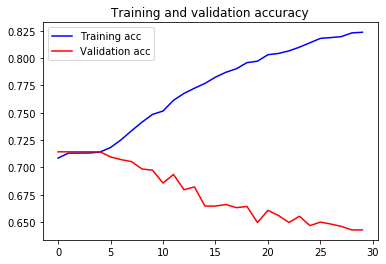

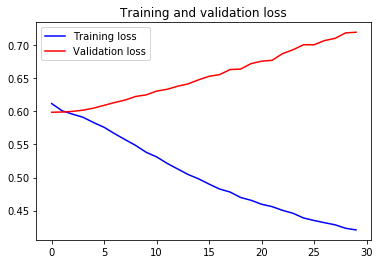

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Neural network with boosting

In [24]:
def nnmodel():
    model = Sequential()
    model.add(Dense(16, input_shape=(1000,), activation='relu'))
    #model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss= 'binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    return(model)
    

In [25]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0), EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [28]:
nn_estimator = KerasClassifier(build_fn= nnmodel, 
                               epochs=30, batch_size=50,
                               validation_split=0.1,
                               verbose=0)

#validation_split=0.1,

bnn = AdaBoostClassifier(base_estimator = nn_estimator, 
                         n_estimators = 500, random_state=0, algorithm='SAMME.R') 

nn_estimator.fit(X_train, y_train)
nn_estimator.score(X_train, y_train)
nn_estimator.score(X_test, y_test)

In [29]:
%%time
bnn_results = bnn.fit(X_train, y_train)

CPU times: user 18h 54min 55s, sys: 24min 33s, total: 19h 19min 29s
Wall time: 15h 59min 56s


In [30]:
print(bnn_results.score(X_train, y_train))
print(bnn_results.score(X_test, y_test))


0.9663571428571428
0.6868571428571428


In [31]:
#save sklearn model
from joblib import dump, load
dump(bnn_results, 'boostednn_imbalanced_imdb.joblib') 

['boostednn_imbalanced_imdb.joblib']

In [32]:
bnn_acc_train = np.zeros((500,))
for i, y_pred in enumerate(bnn.staged_predict(X_train)):
    bnn_acc_train[i] = accuracy_score(y_true = y_train, y_pred = y_pred)
    
bnn_acc_test = np.zeros((500,))
for i, y_pred in enumerate(bnn.staged_predict(X_test)):
    bnn_acc_test[i] = accuracy_score(y_true = y_test, y_pred = y_pred)

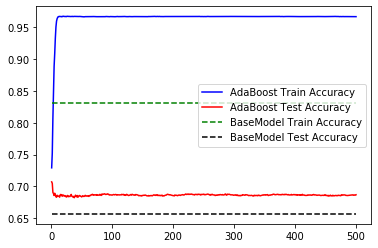

In [33]:
bnn_base_train = np.full((500,), score1[1])
bnn_base_test = np.full((500,), score2[1])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(500) + 1, bnn_acc_train,
       label = "AdaBoost Train Accuracy",
       color = "blue")

ax.plot(np.arange(500) + 1, bnn_acc_test,
       label = "AdaBoost Test Accuracy",
       color = "red")

ax.plot(np.arange(500) + 1, bnn_base_train,
       label = "BaseModel Train Accuracy",
       color = "green", linestyle = "dashed")

ax.plot(np.arange(500) + 1, bnn_base_test,
       label = "BaseModel Test Accuracy",
       color = "black", linestyle = "dashed")

#ax.title('Training and test accuracy of boosting and base model')
ax.legend(loc="center right")


In [34]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=18,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [35]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return 0 if score < 0.5 else 1

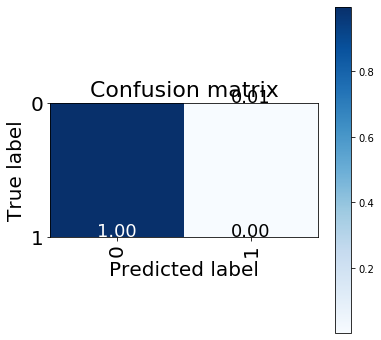

In [36]:
# unboosted logistic
lgt_yy_pred = lgt.predict(X_test)
lgt_matrix = confusion_matrix(y_test, lgt_yy_pred)
plt.figure(figsize=(6,6))
plot_confusion_matrix(lgt_matrix, classes=y_train.unique(), title="Confusion matrix")
plt.show()

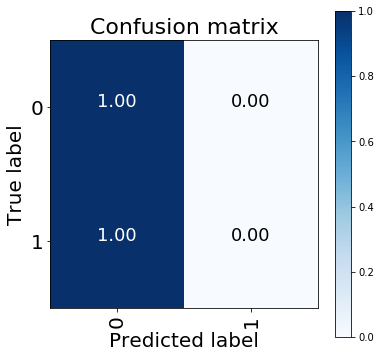

In [481]:
# boosted logistic
blg_yy_pred = blg.predict(X_test)
blg_matrix = confusion_matrix(y_test, blg_yy_pred)
plt.figure(figsize=(6,6))
plot_confusion_matrix(blg_matrix, classes=y_train.unique(), title="Confusion matrix")
plt.show()

In [39]:
%%time
nn_yy_pred = model.predict(X_test)
y_pred_1d = []
y_test_1d = list(y_test)
scores = nn_yy_pred
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in nn_yy_pred]

CPU times: user 11.9 s, sys: 84.7 ms, total: 12 s
Wall time: 11.9 s


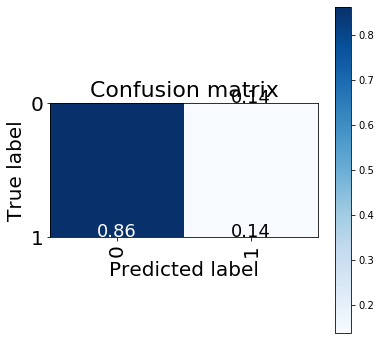

In [40]:


nn_matrix = confusion_matrix(y_test, y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(nn_matrix, classes=y_train.unique(), title="Confusion matrix")
plt.show()

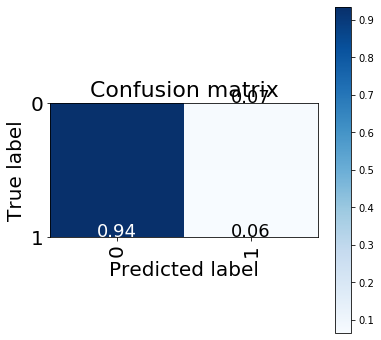

In [37]:
bnn_yy_pred = bnn.predict(X_test)

bnn_matrix = confusion_matrix(y_test, bnn_yy_pred)
plt.figure(figsize=(6,6))
plot_confusion_matrix(bnn_matrix, classes=y_train.unique(), title="Confusion matrix")
plt.show()

In [ ]:
# load sklearn model
#clf = load('boostednn_balanced_data.joblib') 

In [294]:
nn_estimator.get_params().keys()

dict_keys(['epochs', 'batch_size', 'verbose', 'build_fn'])

# use glove

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Convolution1D, MaxPooling1D, LSTM
from keras.layers import Input, Conv1D, MaxPool1D, Bidirectional, GRU
from keras.models import Sequential, Model

In [42]:
import csv

words = pd.read_csv("../sentiment/glove.twitter.27B.200d.txt", sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE)

In [43]:
glove_words = list(words.index)

In [44]:
df_train, df_test = train_test_split(df, test_size=1-0.8, random_state=42)

In [45]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.review)
print(list(tokenizer.word_index.items())[0:10])

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

[('the', 1), ('a', 2), ('and', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('i', 9), ('it', 10)]
Total words 94048
CPU times: user 4.11 s, sys: 26.7 ms, total: 4.13 s
Wall time: 4.18 s


In [46]:
## glove
embedding_matrix = np.zeros((vocab_size, 200)) #Return a new array of given shape and type, filled with zeros.
for word, i in tokenizer.word_index.items():
  if word in glove_words:
    embedding_matrix[i] = words.loc[word]
print(embedding_matrix.shape)
print(len(embedding_matrix[0]))
print(embedding_matrix[17,])

(94048, 200)
200
[-1.9555e-01  2.4593e-01  2.8642e-01  6.9040e-02  9.7236e-02 -1.1472e-01
 -9.3261e-02 -2.4212e-01 -1.7315e-01 -5.2265e-01 -1.7606e-01  8.8441e-02
 -1.3740e+00  7.5817e-02 -5.4895e-02 -2.7249e-01 -3.9062e-01 -6.0248e-01
 -8.4906e-01  1.2079e-01  1.0347e-01  2.8514e-01  5.9581e-02  6.9788e-02
  9.2949e-03  1.2609e+00  2.2246e-01  3.6331e-01  6.2964e-01 -2.2033e-01
  1.1765e-01 -1.6778e-01 -3.1076e-01  7.9073e-02  1.2395e-01 -9.5940e-02
  1.8736e-01 -5.6612e-02  6.3339e-01  6.3070e-01  9.0257e-03  2.0244e-01
  3.4550e-01  2.7613e-01  3.4946e-02 -4.2677e-02 -1.4358e-01  4.1667e-01
  7.7393e-02  6.3789e-02 -1.0028e-01  4.9936e-02 -2.6797e-01 -8.0136e-02
  6.6586e-02  5.3841e-01  3.2489e-03 -4.5248e-01  8.4208e-02  3.0577e-01
  1.3845e-01  1.0177e-01 -1.5826e-01  1.2483e-01  2.4240e-01 -1.4201e-01
 -2.0281e-01 -8.6975e-02  1.7893e-01 -2.0039e-01 -5.3439e-02 -1.1037e-01
 -5.7431e-01 -2.1188e-01  3.6272e-01  4.0426e-01 -8.0378e-02 -2.0270e-01
 -1.9664e-01 -6.9863e-03  1.0013e+

In [47]:
%%time
print(list(df_train.review)[0])
print(tokenizer.texts_to_sequences(df_train.review)[0]) # transform to numerical labels


x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.review), maxlen=100) # pad a window to a same lenght
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.review), maxlen=100)


This is the worst piece of crap I have seen recently. There is nothing good about this movie. The plot is plain stupid, dialogs don't make any sense, humorous scenes never heard anything about the real humor. Actors just don't play, the worse they don't even try. The script itself is somewhat which is in the same league with Ed Wood and Uwe Boll. There is only one good thing in this flick, the fights. They are well choreographed as one would expect of the Hong Kong guys, and are the only reason to watch Prince of the Sun. Although I believe the fights are just supposed to fill the empty space so that the screenwriter didn't have to bother thinking about the storyline. However, this weak and absurd plot may prevent you from watching it to the end. Avoid it unless you are fan of the dragon lady Cynthia Rothrock.
[11, 6, 1, 185, 402, 4, 463, 9, 24, 107, 1115, 44, 6, 142, 49, 42, 11, 14, 1, 102, 6, 928, 290, 3021, 79, 85, 93, 281, 2072, 130, 112, 566, 207, 42, 1, 153, 483, 149, 38, 79, 310

In [48]:
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=100, trainable=False)

In [49]:
main_input = Input(shape=(100,), dtype='float64')
embed = embedding_layer(main_input)
drop = Dropout(0.3)(embed)
#rnn1 = Bidirectional(LSTM(100, return_sequences = True, dropout=0.2, recurrent_dropout=0.1))(drop)
rnn2 = Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.1))(drop)
dense = Dense(32)(rnn2)
main_output = Dense(1, activation='sigmoid')(dense)
rnnm = Model(inputs = main_input, outputs = main_output)
rnnm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 200)          18809600  
_________________________________________________________________
dropout_502 (Dropout)        (None, 100, 200)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_1003 (Dense)           (None, 32)                6432      
_________________________________________________________________
dense_1004 (Dense)           (None, 1)                 33        
Total params: 19,056,865
Trainable params: 247,265
Non-trainable params: 18,809,600
__________________________________________________________

In [50]:
rnnm.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [51]:
%%time
history = rnnm.fit(x_train, y_train,
                    batch_size=50,
                    epochs=30,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 25200 samples, validate on 2800 samples
Epoch 1/30
25200/25200 [==============================] - 109s 4ms/step - loss: 0.4874 - acc: 0.7725 - val_loss: 0.4068 - val_acc: 0.8246
Epoch 2/30
25200/25200 [==============================] - 80s 3ms/step - loss: 0.3933 - acc: 0.8218 - val_loss: 0.3391 - val_acc: 0.8539
Epoch 3/30
25200/25200 [==============================] - 80s 3ms/step - loss: 0.3539 - acc: 0.8431 - val_loss: 0.3173 - val_acc: 0.8721
Epoch 4/30
25200/25200 [==============================] - 80s 3ms/step - loss: 0.3333 - acc: 0.8532 - val_loss: 0.3153 - val_acc: 0.8643
Epoch 5/30
25200/25200 [==============================] - 80s 3ms/step - loss: 0.3186 - acc: 0.8600 - val_loss: 0.3255 - val_acc: 0.8596
Epoch 6/30
25200/25200 [==============================] - 80s 3ms/step - loss: 0.2995 - acc: 0.8694 - val_loss: 0.2913 - val_acc: 0.8771
Epoch 7/30
25200/25200 [==============================] - 80s 3ms/step - loss: 0.2897 - acc: 0.8754 - val_loss: 0.3313 - val_acc

In [52]:
%%time
score = rnnm.evaluate(x_test, y_test, batch_size=50)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

7000/7000 [==============================] - 8s 1ms/step

ACCURACY: 0.867857140302658
LOSS: 0.34438453763723376
CPU times: user 16.5 s, sys: 2.11 s, total: 18.7 s
Wall time: 7.87 s
